In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Create sample data
date_range = pd.date_range(start='2018-01-01', end = '2022-12-31', freq = 'M')
data = pd.DataFrame({
    'date' : date_range,
    'values' : np.random.rand(len(date_range)) * 100 + 500
})
date_range

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
      

In [5]:
data.set_index('date', inplace = True)

In [6]:
trend = data.rolling(window=12).mean()
trend.head()

,values
date,
2018-01-31,NaN
2018-02-28,NaN
2018-03-31,NaN
2018-04-30,NaN
2018-05-31,NaN


In [8]:
seasonal_indices = data / trend
seasonal_indices.head()

,values
date,
2018-01-31,NaN
2018-02-28,NaN
2018-03-31,NaN
2018-04-30,NaN
2018-05-31,NaN


In [9]:
average_seasonal_indices = seasonal_indices.groupby(seasonal_indices.index.month).mean()
average_seasonal_indices.head()

,values
date,
1,1.042183
2,0.969254
3,0.990147
4,0.987715
5,0.997392


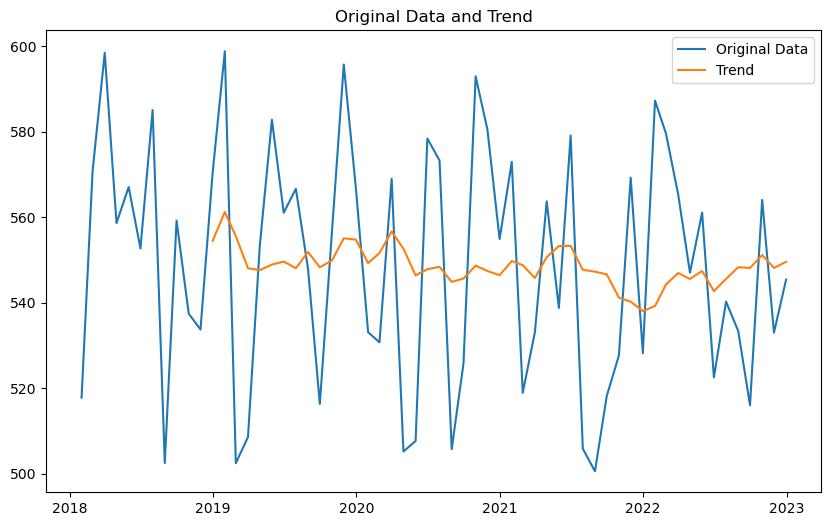

In [11]:
plt.figure(figsize = (10,6))
plt.plot(data.index, data.values, label='Original Data')
plt.plot(trend.index, trend.values, label = 'Trend')
plt.legend()
plt.title('Original Data and Trend')
plt.show()

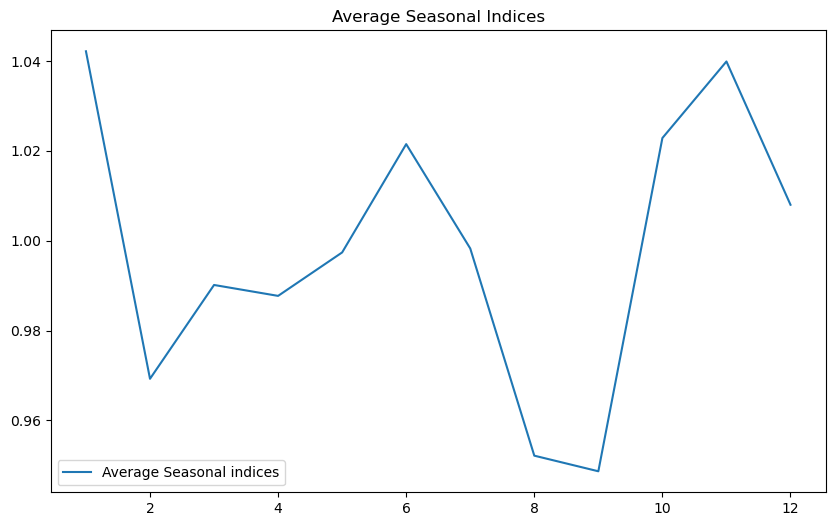

In [12]:
plt.figure(figsize=(10,6))
plt.plot(average_seasonal_indices.index, average_seasonal_indices.values, label = 'Average Seasonal indices')
plt.legend()
plt.title('Average Seasonal Indices')
plt.show()